The Watts–Strogatz small-world model

This is also a symmetric and binary model. This model has three parameters, n, c, and p; c should be even. It consists of n nodes placed in a circle, each connected to its c nearest neighbors (so that c = 2 gives an ordinary circle) with additional random connections. To generate this network, we follow these steps:
1. Generate an empty adjacency matrix with zeros which has a size of n × n.
2. For every i and j, make $A_{ij} = A_{ji} = 1$ if $∣i − j∣$ ranges from 1 to c/2 (the norm
should be calculated with periodic boundary conditions).
3. In a double for-loop, randomly rewire each connection with a probability of p.

a) With n = 20, p = 0, and c = 2, generate a Watts–Strogatz small-world graph and plot it, as shown in figure 12.3(a). Repeat for c = 4 and c = 8.

b) Repeat for p ≠ 0 and visualize the difference, as in figure 12.3(b).

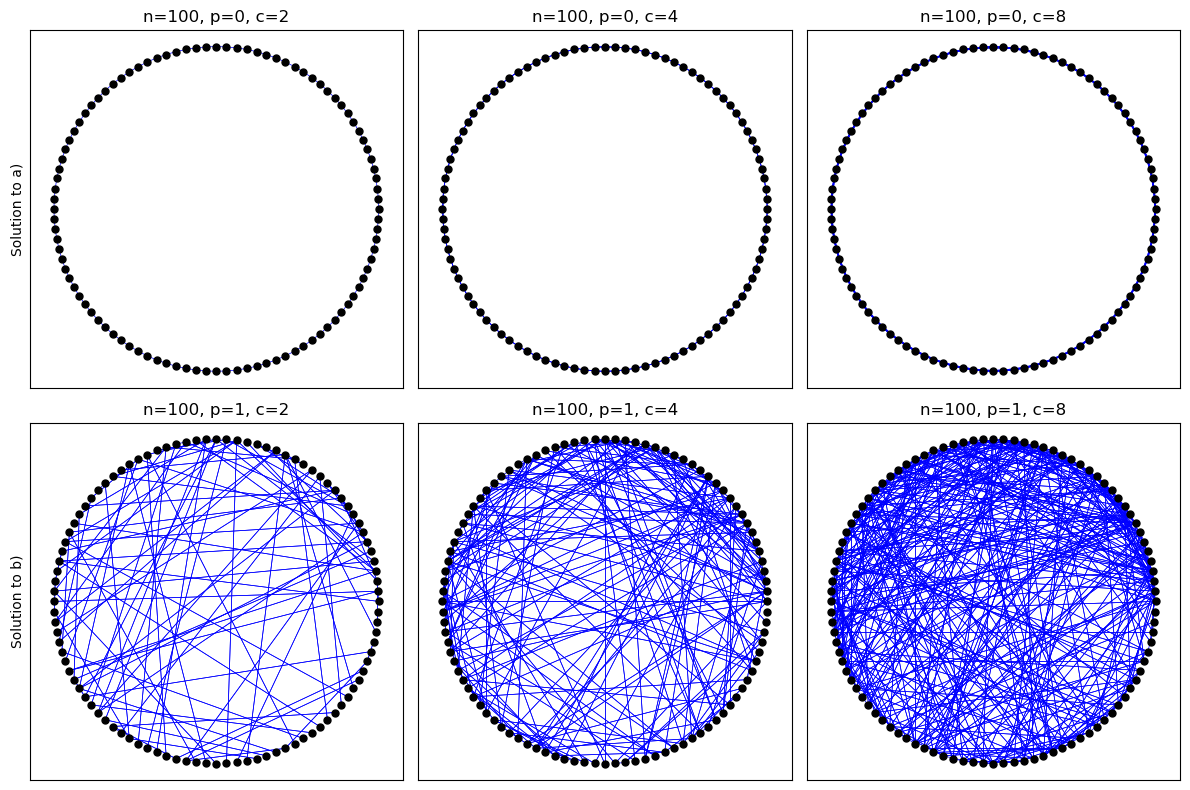

In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 100
differentC = [2,4,8]
probabilities = [0,1]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for j, c in enumerate(differentC):

    boundary = c/2
    adjMatrix = np.zeros((n, n))
    for k in range(n):
        for l in range(n):
            if 1 <= np.absolute((k - l)%n) and np.absolute((l - k)%n) <= boundary:
                adjMatrix[k, l] = 1
                adjMatrix[l, k] = 1
    
    ogAdjMatrix = adjMatrix

    for i, p in enumerate(probabilities):

        randMatrix = np.random.uniform(low=0.0, high=1.0, size=(n, n))
        #rewiring
        for q in range(n):
            for s in range(q,n):
                if adjMatrix[q,s] == 1:
                    if randMatrix[q,s]<=p:
                        zeroIndices = np.where(adjMatrix[q,:] == 0)[0]
                        index = np.random.choice(zeroIndices)
                        randMatrix[q,index]=1
                        adjMatrix[q,s] = 0
                        adjMatrix[s,q] = 0
                        adjMatrix[q,index] = 1
                        adjMatrix[index,q] = 1

                
        theta = np.linspace(0, 2 * np.pi, n, endpoint=False)
        xCircle = np.cos(theta)
        yCircle = np.sin(theta)

        # drawing the lines
        for k in range(n):
            for l in range(n):
                if 1 <= np.absolute((k - l)%n) and np.absolute((l-k)%n) <= boundary and adjMatrix[k,l] == 1:
                    axes[i,j].plot([xCircle[k], xCircle[l]], [yCircle[k], yCircle[l]], 'b-', linewidth=0.5)
                    
                elif ~(1 <= np.absolute((k - l)%n) and np.absolute((k - l)%n) <= boundary) and adjMatrix[k, l] == 1:
                    axes[i,j].plot([xCircle[k], xCircle[l]], [yCircle[k], yCircle[l]], 'b-', linewidth=0.5)

        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])

        axes[i,j].plot(xCircle, yCircle, 'ko', markersize=5)
        axes[i,j].axis('equal')
        axes[i,j].set_title(f'n={n}, p={p}, c={c}')

        adjMatrix = ogAdjMatrix

axes[0, 0].set_ylabel("Solution to a)")
axes[1, 0].set_ylabel("Solution to b)")

plt.tight_layout()
plt.show()